In [172]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [173]:
img_size = 256
Batch_size = 32
rgb = 3

In [174]:
path = "C:\\Users\\naray\\OneDrive\\Desktop\\PlantVillage"

In [175]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    shuffle = True,
    image_size = (img_size,img_size),
    batch_size = Batch_size   
)

Found 2152 files belonging to 3 classes.


In [176]:
labels = dataset.class_names

In [177]:
labels

['Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy']

In [178]:
for img_batch,label_batch in dataset :
    print(img_batch.shape)

(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 

In [179]:
len(dataset)

68

In [180]:
# THERE ARE 68 BATCHES OF IMAGES. ALL BATCHES CONTAIN 32 IMAGES EACH EXCEPT THE LAST BATCH 

In [181]:
for img_batch,label_batch in dataset.take(1) :
    print(label_batch.numpy())
    print(label_batch.shape)

[1 1 1 1 1 1 2 0 1 2 1 1 0 2 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0]
(32,)


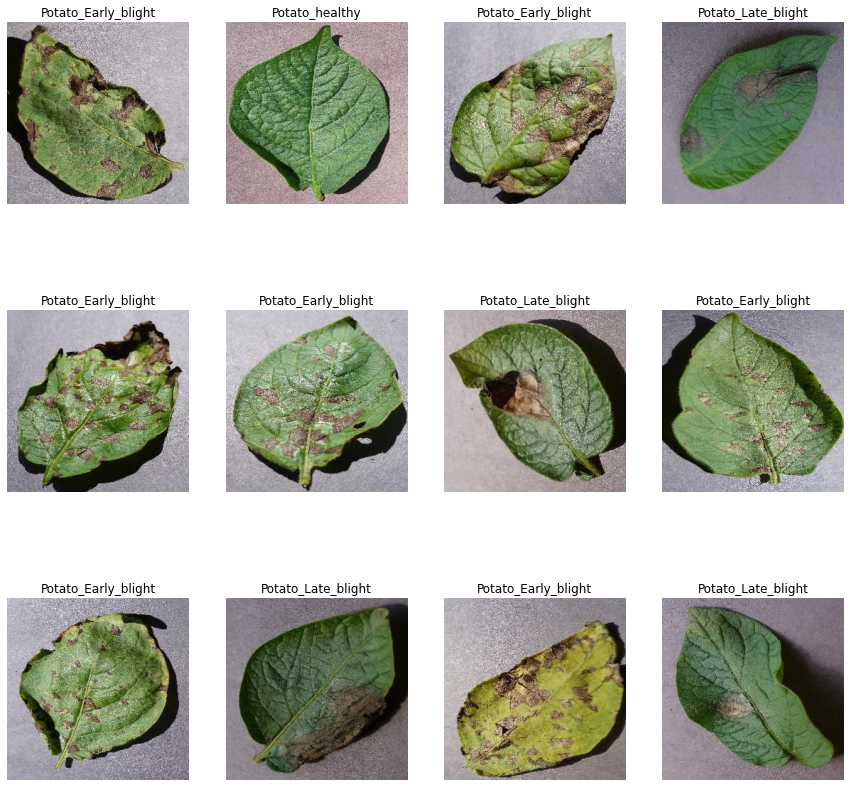

In [182]:
plt.figure(figsize = (15,15))
for img_batch,label_batch in dataset.take(1) :
    for i in range(12) :
        
        plt.subplot(3,4,i+1)
        plt.imshow(img_batch[i].numpy().astype("uint8"))
        plt.title(labels[label_batch[i]])
        plt.axis("off")

In [183]:
train_size = 0.8
val_size = 0.1
test_size = 0.1

In [184]:
def train_test_splitting(dataset,train_size = 0.8,val_size = 0.1,test_size = 0.1) :
    data_size = len(dataset)
    
    if True :
        dataset = dataset.shuffle(10000,seed = 12)
    
    train_length = int(data_size*train_size)
    val_length = int(data_size*val_size)
    
    train_set = dataset.take(train_length)
    val_set = dataset.skip(train_length).take(val_length)
    test_set = dataset.skip(train_length).skip(val_length)
    
    return train_set,val_set,test_set
    

In [185]:
train,validate,test = train_test_splitting(dataset)

In [186]:
len(train)

54

In [187]:
len(test)

8

In [188]:
train = train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validate = validate.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [189]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size,img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [190]:
data_augment = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [191]:
input_img_shape = (Batch_size,img_size,img_size,rgb)

In [192]:
noclass = 3

In [193]:
model = models.Sequential([
    resize_and_rescale,
    data_augment,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_img_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_img_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_img_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_img_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_img_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_img_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(noclass,activation = 'softmax'),
])

In [194]:
model.build(input_shape = input_img_shape)

In [195]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_7 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 32)         0         
 2D)                                                  

In [198]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [201]:
history = model.fit(
    train,
    epochs = 50,
    batch_size = Batch_size,
    verbose = 1,
    validation_data = validate
)

Epoch 1/50
54/54 [==============================] - 40s 705ms/step - loss: 0.9050 - accuracy: 0.5243 - val_loss: 0.7529 - val_accuracy: 0.6979
Epoch 2/50
54/54 [==============================] - 41s 765ms/step - loss: 0.6712 - accuracy: 0.7141 - val_loss: 0.4123 - val_accuracy: 0.8698
Epoch 3/50
54/54 [==============================] - 42s 776ms/step - loss: 0.3890 - accuracy: 0.8420 - val_loss: 0.2853 - val_accuracy: 0.9271
Epoch 4/50
54/54 [==============================] - 44s 820ms/step - loss: 0.3250 - accuracy: 0.8605 - val_loss: 0.3358 - val_accuracy: 0.8333
Epoch 5/50
54/54 [==============================] - 43s 802ms/step - loss: 0.2459 - accuracy: 0.9022 - val_loss: 0.4555 - val_accuracy: 0.7917
Epoch 6/50
54/54 [==============================] - 44s 822ms/step - loss: 0.1482 - accuracy: 0.9479 - val_loss: 0.1656 - val_accuracy: 0.9271
Epoch 7/50
54/54 [==============================] - 45s 838ms/step - loss: 0.1196 - accuracy: 0.9578 - val_loss: 0.3487 - val_accuracy: 0.8750

In [205]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [206]:
Training_loss = history.history['loss']
Training_Accuracy = history.history['accuracy']

Validation_Loss = history.history['val_loss']
Validation_Accuracy = history.history['val_accuracy']

Text(0.5, 1.0, 'TRAINING AND VALIDATION LOSS')

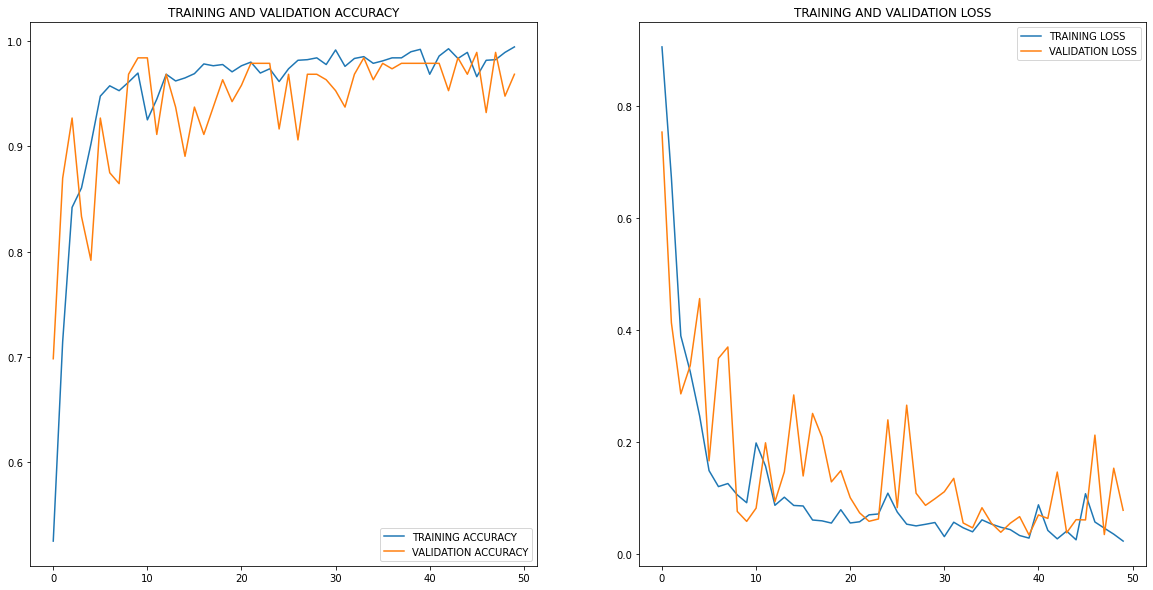

In [215]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)

plt.plot(range(50),Training_Accuracy,label = 'TRAINING ACCURACY')
plt.plot(range(50),Validation_Accuracy,label = 'VALIDATION ACCURACY')
plt.legend(loc = 'lower right')
plt.title('TRAINING AND VALIDATION ACCURACY')

plt.subplot(1,2,2)
plt.plot(range(50),Training_loss,label = 'TRAINING LOSS')
plt.plot(range(50),Validation_Loss,label = 'VALIDATION LOSS')
plt.legend(loc = 'upper right')
plt.title('TRAINING AND VALIDATION LOSS')
